2274802011045 - Truong Viet Vu

# Một số thuật toán cơ bản của Machine learning


## 1. Linear Regression

[[ 4.48674910e-01  9.72425752e-03 -1.23323343e-01  7.83144907e-01
  -2.02962058e-06 -3.52631849e-03 -4.19792487e-01 -4.33708065e-01]]
[-37.02327771]
[[0.71912284]
 [1.76401657]
 [2.70965883]
 ...
 [4.46877017]
 [1.18751119]
 [2.00940251]]
0.5757877060324511


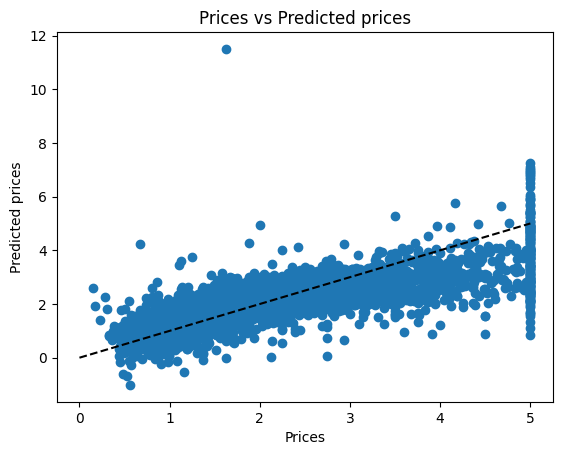

0.555891598695244


In [2]:
## 1.Linear regression 
# Biết: hồi quy tuyến tính là dự đoán giá trị liên tục dựa trên 1 hoặc nhiều biến độc lập

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

# sử dụng hồi quy tuyến tính để dự đoán giá nhà thoog qua bộ dữ liệu Boston house
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.DataFrame(housing.target, columns=['target'])

#  chia tập dữ liệu có 8:2 train và test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# tạo mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X_train, y_train)

print(model.coef_)

print(model.intercept_)
# dự đoán giá nhà
y_pred = model.predict(X_test)
print(y_pred)

r2_score = model.score(X_test, y_test)
print(r2_score)

# vẽ biểu đồ
plt.scatter(y_test, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
# đường hồi quy
plt.plot([0, 5], [0, 5], '--k')
plt.axis('tight')
plt.show()


from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred))

0.5747759809992782


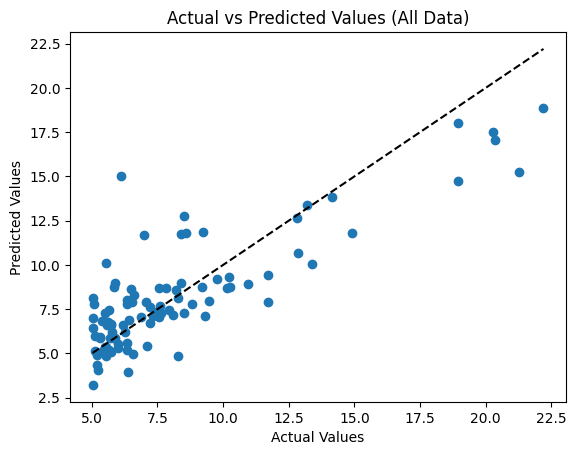

8.56501091009175


In [3]:
df = pd.read_csv('lab1data1.csv')

X = pd.DataFrame(df['x'])
y = pd.DataFrame(df['y'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the values
y_pred = model.predict(X_test)

# Calculate the R^2 score
r2_score = model.score(X_test, y_test)
print(r2_score)


# Plot the results for all data
y_all_pred = model.predict(X)
plt.scatter(y, y_all_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (All Data)")
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--k')
plt.axis('tight')
plt.show()

# Calculate and print the mean squared error
print(mean_squared_error(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        54
           1       0.98      0.98      0.98        89

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

[[52  2]
 [ 2 87]]


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


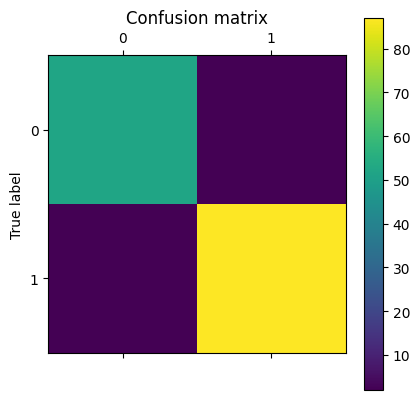

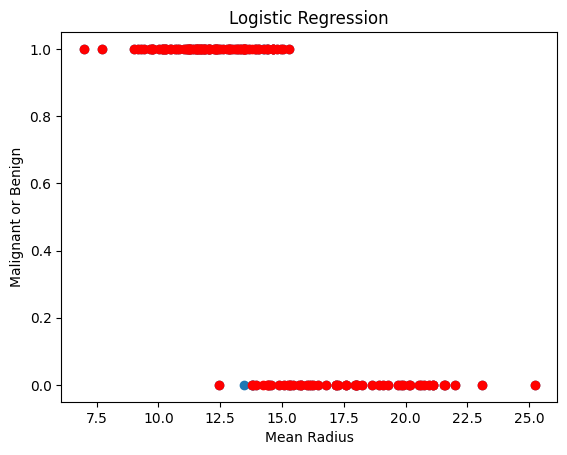

In [4]:
#  Hồi quy logistic: phân loại nhị phân hoặc đa lớp dựa trên các dữ liệu đặc trưng 
#  Xây dựng mô hình hồi quy logistic để phân loại nhị phân trong dữ liệu breast cancer
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = pd.DataFrame(cancer.target, columns=['target'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train.values.ravel())

# Predict the values for the testing set
y_pred = model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

# trực quan hóa dữ liệu logistic regression
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.show()

# đường logistic
plt.scatter(X_test['mean radius'], y_test)
plt.scatter(X_test['mean radius'], y_pred, color='red')
plt.xlabel('Mean Radius')
plt.ylabel('Malignant or Benign')
plt.title('Logistic Regression')

plt.show()





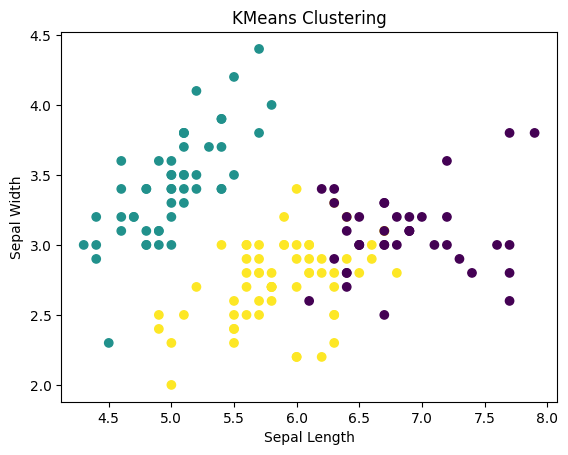

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.00      0.00      0.00        50
           2       0.23      0.28      0.25        50

    accuracy                           0.09       150
   macro avg       0.08      0.09      0.08       150
weighted avg       0.08      0.09      0.08       150

[[ 0 50  0]
 [ 3  0 47]
 [36  0 14]]


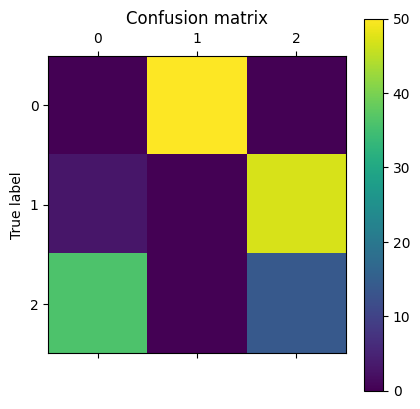

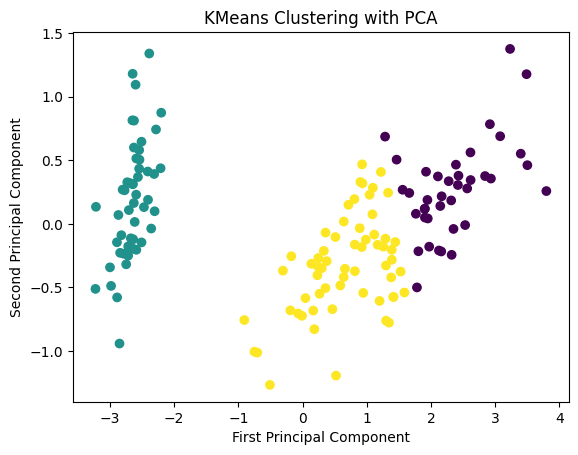

In [5]:
# Phân cụm
# Nhóm các đối tươnnng có đặc điểm tương tự mà không cần nhãn
# sử dụng data Iris để pHân cụm
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA


iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.DataFrame(iris.target, columns=['target'])

# Create and train a KMeans model
model = KMeans(n_clusters=3, random_state=42)
model.fit(X)

# Predict the values
y_pred = model.predict(X)

# vẽ biểu đồ phân cụm 
plt.scatter(X['sepal length (cm)'], X['sepal width (cm)'], c=y_pred)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('KMeans Clustering')
plt.show()
# Print the classification report
print(classification_report(y, y_pred))

# Print the confusion matrix
print(confusion_matrix(y, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y, y_pred)
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.show()


# sử dụng PCA để giảm chiều dữ liệu (giải thích ở btvn)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create and train a KMeans model
model = KMeans(n_clusters=3)
model.fit(X_pca)

# Predict the values

y_pred = model.predict(X_pca)

# Plot the results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('KMeans Clustering with PCA')
plt.show()

              precision    recall  f1-score   support

           0       0.85      0.99      0.91       610
           1       0.60      0.10      0.17       122

    accuracy                           0.84       732
   macro avg       0.72      0.54      0.54       732
weighted avg       0.80      0.84      0.79       732

[[602   8]
 [110  12]]


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


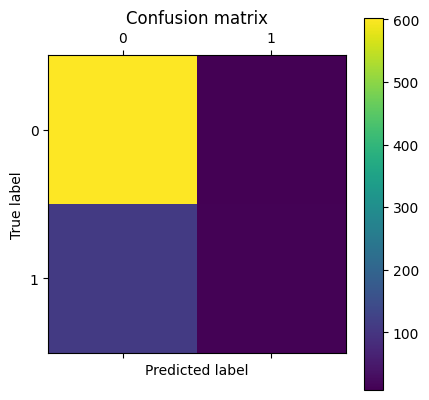

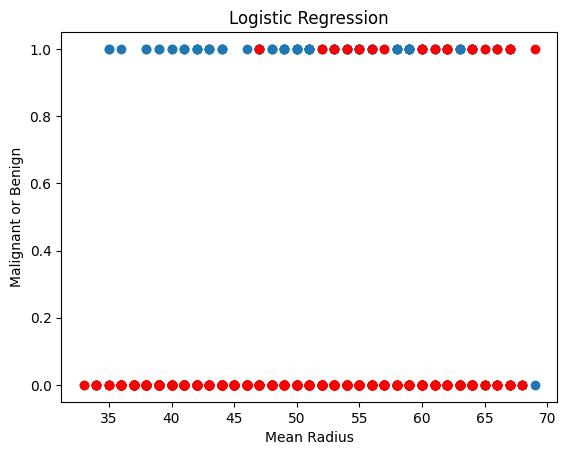

In [6]:
# BTVN: 
# 1.cho tập dữ liệu dự đoán bệnh tim bằng hồi quy logistic
df = pd.read_csv('framingham.csv')
df = df.dropna()
# Split the data into training and testing sets
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict the values for the testing set
y_pred = model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
# đường logistic
plt.scatter(X_test['age'], y_test)
plt.scatter(X_test['age'], y_pred, color='red')
plt.xlabel('Mean Radius')
plt.ylabel('Malignant or Benign')
plt.title('Logistic Regression')

plt.show()
#


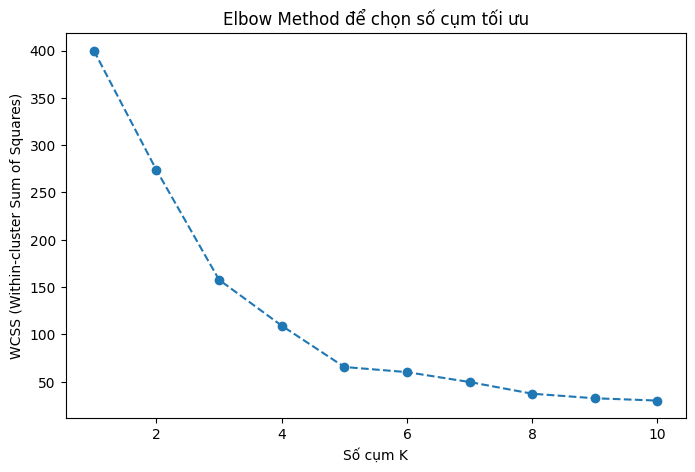

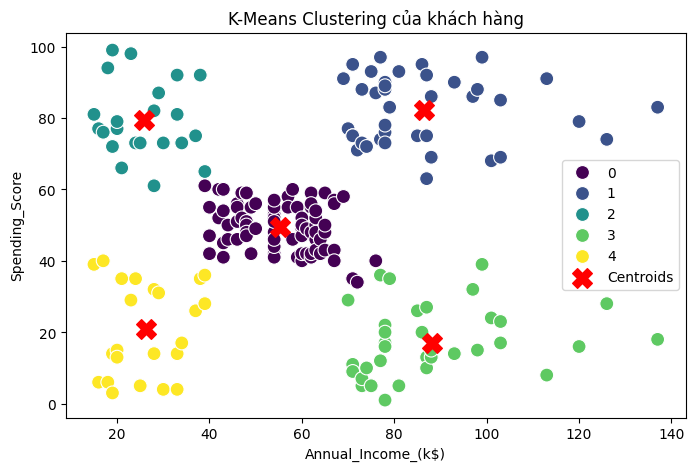

In [6]:
# 2. Ứng dụng học toán phân cụm K mean cho tập dữ liệu customer data , you can get in kaggle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# Đọc tệp dữ liệu
df = pd.read_csv("customer.csv")
X = df[['Annual_Income', 'Spending_Score']]

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Sử dụng phương pháp Elbow để tìm số cụm tốt nhất
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # Tổng bình phương khoảng cách trong cụm

# Vẽ biểu đồ
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel("Số cụm K")
plt.ylabel("WCSS (Within-cluster Sum of Squares)")
plt.title("Elbow Method để chọn số cụm tối ưu")
plt.show()
# Huấn luyện mô hình K-Means
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)
# Vẽ biểu đồ scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Annual_Income'], y=df['Spending_Score'], hue=df['Cluster'], palette='viridis', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0] * scaler.scale_[0] + scaler.mean_[0], 
            kmeans.cluster_centers_[:, 1] * scaler.scale_[1] + scaler.mean_[1], 
            s=200, c='red', label='Centroids', marker='X')
plt.xlabel("Annual_Income_(k$)")
plt.ylabel("Spending_Score")
plt.title("K-Means Clustering của khách hàng")
plt.legend()
plt.show()

bt3: tìm hiểu về ma trận nhầm lẫn và đánh giá độ chính xác trên các bài tập lớn
Ma trận nhầm lẫn (Confusion Matrix) là một công cụ hữu ích để đánh giá hiệu suất của một mô hình phân loại. Nó cung cấp một cái nhìn chi tiết về cách mô hình phân loại các mẫu vào các lớp khác nhau. Ma trận nhầm lẫn bao gồm các thành phần sau:

True Positive (TP): Số lượng mẫu dương tính được dự đoán đúng.
True Negative (TN): Số lượng mẫu âm tính được dự đoán đúng.
False Positive (FP): Số lượng mẫu âm tính nhưng được dự đoán là dương tính (còn gọi là lỗi loại I).
False Negative (FN): Số lượng mẫu dương tính nhưng được dự đoán là âm tính (còn gọi là lỗi loại II).
Dựa trên ma trận nhầm lẫn, ta có thể tính toán các chỉ số đánh giá hiệu suất của mô hình như sau:

Accuracy (Độ chính xác): Tỷ lệ mẫu được dự đoán đúng trên tổng số mẫu. 

Precision (Độ chính xác của dương tính): Tỷ lệ mẫu dương tính được dự đoán đúng trên tổng số mẫu được dự đoán là dương tính. 

Recall (Độ nhạy): Tỷ lệ mẫu dương tính được dự đoán đúng trên tổng số mẫu thực sự là dương tính. 

F1 Score: Trung bình điều hòa của Precision và Recall. 

### Giải thích PCA
PCA là một kỹ thuật giảm chiều dữ liệu trong học máy và thống kê. Mục tiêu của PCA là:

Giảm số chiều của dữ liệu: Biến đổi một tập hợp lớn các biến (features) thành một tập hợp nhỏ hơn (gọi là các thành phần chính - principal components).
Giữ lại thông tin quan trọng: Các thành phần chính được chọn sao cho giữ lại phần lớn phương sai (variance) của dữ liệu gốc.
Loại bỏ sự tương quan: Các thành phần chính là không tương quan với nhau (độc lập tuyến tính).
PCA thường được sử dụng khi:

Dữ liệu có quá nhiều biến, gây khó khăn cho việc xử lý hoặc trực quan hóa.
Muốn giảm thiểu chi phí tính toán mà không mất quá nhiều thông tin.
Cách PCA hoạt động
Chuẩn hóa dữ liệu: Đảm bảo các biến có cùng thang đo (thường bằng cách chuẩn hóa về trung bình 0 và độ lệch chuẩn 1).
Tính ma trận hiệp phương sai: Đo lường mức độ tương quan giữa các biến.
Tính toán giá trị riêng (eigenvalues) và vector riêng (eigenvectors): Các vector riêng đại diện cho hướng của các thành phần chính, còn giá trị riêng thể hiện mức độ quan trọng (phương sai) của hướng đó.
Chọn thành phần chính: Sắp xếp các vector riêng theo thứ tự giá trị riêng giảm dần và chọn số lượng thành phần mong muốn (ví dụ: 2 trong trường hợp của bạn).
Biến đổi dữ liệu: Chiếu dữ liệu gốc lên không gian mới được định nghĩa bởi các thành phần chính đã chọn.

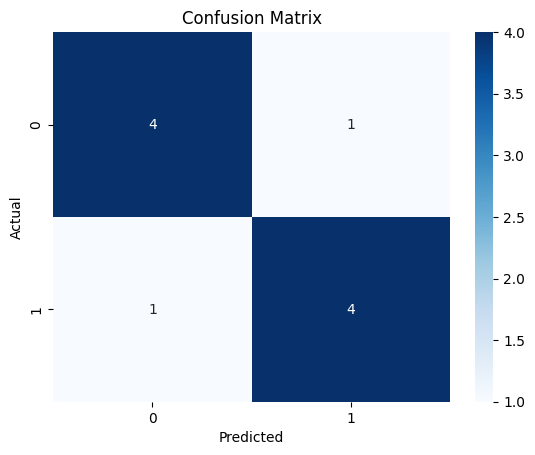

Accuracy: 0.8
Precision: 0.8
Recall: 0.8
F1 Score: 0.8


In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Giả sử y_test là nhãn thực tế và y_pred là nhãn dự đoán
y_test = [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
y_pred = [0, 0, 0, 1, 0, 1, 1, 1, 0, 1]

# Tính toán ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)

# Hiển thị ma trận nhầm lẫn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Tính toán các chỉ số đánh giá
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')